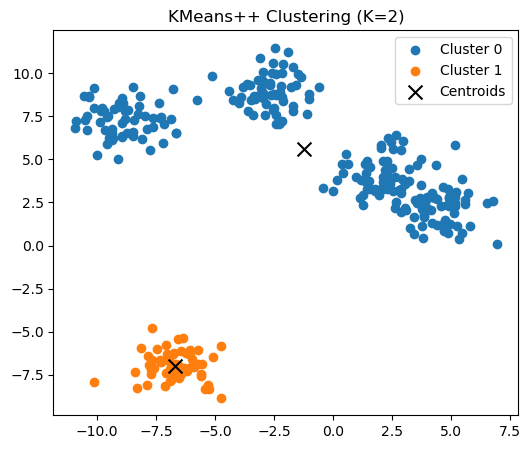

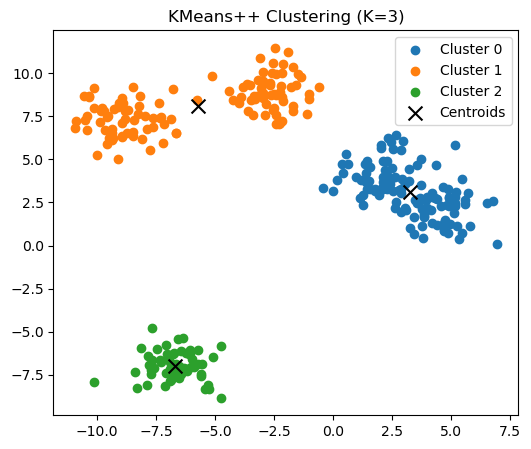

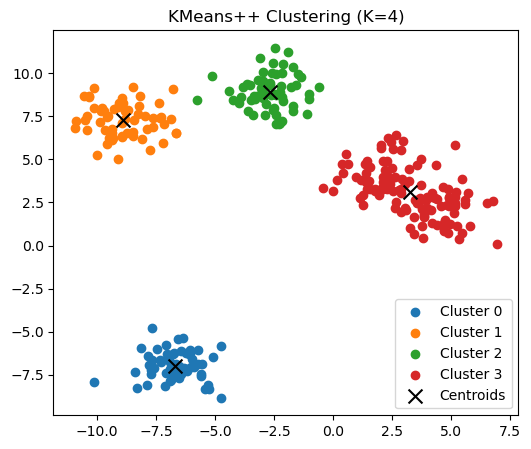

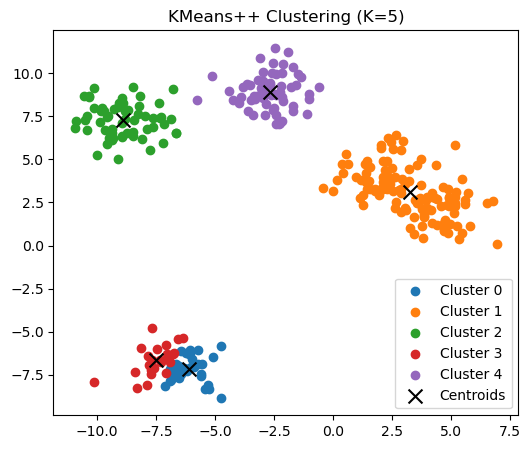

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class KMeansPlusPlus:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def _euclidean_distance(self, a, b):
        # Calculate Euclidean distance between a point 'a' and point 'b'
        return np.sqrt(np.sum((a - b) ** 2))

    def _initialize_centroids(self, X):
        # Initialize the first centroid randomly from the dataset
        centroids = [X[np.random.choice(X.shape[0])]]

        for k in range(1, self.n_clusters):
            # Compute the distance of each point to the nearest centroid
            distances = np.array([min([self._euclidean_distance(x, c) for c in centroids]) for x in X])

            # Square the distances and normalize to form a probability distribution
            probs = distances ** 2
            probs /= probs.sum()

            # Choose the next centroid based on this probability distribution
            next_centroid = X[np.random.choice(X.shape[0], p=probs)]
            centroids.append(next_centroid)

        return np.array(centroids)

    def fit(self, X):
        # Step 1: Initialize centroids using KMeans++
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            # Step 2: Assign each point to the closest centroid
            distances = np.array([[self._euclidean_distance(x, c) for c in self.centroids] for x in X])
            self.labels = np.argmin(distances, axis=1)

            # Step 3: Update centroids by computing the mean of assigned points
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Step 4: If centroids do not change much, stop the iteration (convergence)
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        # Assign new data points to the nearest centroid
        distances = np.array([[self._euclidean_distance(x, c) for c in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

# Generate synthetic data with make_blobs
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Try different values of K and visualize the results
for k in range(2, 6):
    kmeans_pp = KMeansPlusPlus(n_clusters=k)
    kmeans_pp.fit(X)
    labels = kmeans_pp.labels
    centroids = kmeans_pp.centroids

    # Plot the clusters and centroids
    plt.figure(figsize=(6, 5))
    for cluster_id in range(k):
        cluster_points = X[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(f'KMeans++ Clustering (K={k})')
    plt.legend()
    plt.show()
